## Observations and Insights 

Conclusions:
1. Capomulin appears to be effective in reducing tumour size over the time periods used for these experiments.
2. Ramicane seems to, on average, be the most effective at reducing tumour size (though it is only very slightly better than Capomulin.)
3. Tumour volume and mouse weight is positively correlated in the Capomulin treatment group.

In [231]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
data_complete_df = pd.merge(mouse_metadata, study_results, how="outer")
# Display the data table for preview
data_complete_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumour Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [198]:
# Checking the number of mice.
mice_count = data_complete_df["Mouse ID"].nunique()
mice_count

249

In [199]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_ID = data_complete_df.loc[data_complete_df.duplicated(subset=["Mouse ID", "Timepoint"]), "Mouse ID"].unique()
duplicate_ID


array(['g989'], dtype=object)

In [200]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_data = data_complete_df.loc[data_complete_df["Mouse ID"] == "g989", :]
duplicate_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumour Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [201]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
data_clean_df = data_complete_df[data_complete_df["Mouse ID"].isin(duplicate_ID) == False]
data_clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumour Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [202]:
# Checking the number of mice in the clean DataFrame.
mice_count = data_clean_df["Mouse ID"].nunique()
mice_count

248

## Summary Statistics

In [203]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumour volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumour volume. 
mean_tumour = data_clean_df["Tumour Volume (mm3)"].groupby(data_clean_df["Drug Regimen"]).mean()
median_tumour = data_clean_df["Tumour Volume (mm3)"].groupby(data_clean_df["Drug Regimen"]).median()
variance_tumour = data_clean_df["Tumour Volume (mm3)"].groupby(data_clean_df["Drug Regimen"]).var()
stdev_tumour = data_clean_df["Tumour Volume (mm3)"].groupby(data_clean_df["Drug Regimen"]).std()
SEM_tumour = data_clean_df["Tumour Volume (mm3)"].groupby(data_clean_df["Drug Regimen"]).sem()
# Assemble the resulting series into a single summary dataframe.
summary_stats = pd.DataFrame({"Mean Tumour Volume" : mean_tumour,
                                "Median Tumour Volume" : median_tumour,
                                "Tumour Volume Variance" : variance_tumour,
                                "Tumour Vol Standard Deviation" : stdev_tumour,
                                "Tumour Vol SEM" : SEM_tumour})
summary_stats

,Mean Tumour Volume,Median Tumour Volume,Tumour Volume Variance,Tumour Vol Standard Deviation,Tumour Vol SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [204]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumour volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line
aggregate_stats = data_clean_df.groupby(["Drug Regimen"])[["Tumour Volume (mm3)"]].agg(["mean", "median", "var", "std", "sem"])
aggregate_stats

Tumour Volume (mm3)                                          
                            mean     median        var       std       sem
Drug Regimen                                                              
Capomulin              40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin               52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol              52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril               55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol               54.331565  52.509285  66.173479  8.134708  0.596466
Placebo                54.033581  52.288934  61.168083  7.821003  0.581331
Propriva               52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane               40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn               54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol              53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

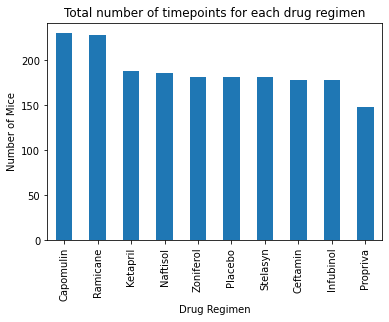

In [205]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
mice_valuecount = data_clean_df["Drug Regimen"].value_counts()
bar_pandas = mice_valuecount.plot.bar()
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")
plt.title("Total number of timepoints for each drug regimen")
plt.show()

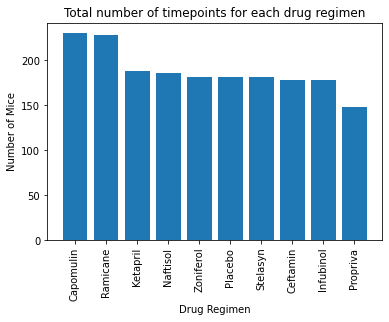

In [206]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
plt.bar(mice_valuecount.index.values, mice_valuecount.values)
plt.xticks(rotation="vertical")
plt.title("Total number of timepoints for each drug regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")
plt.show()

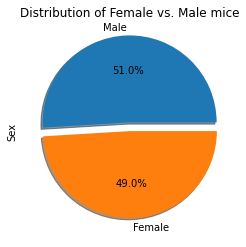

In [207]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
mice_sex = data_clean_df["Sex"].value_counts()
explodes = [0.1, 0]
sex_pandas = mice_sex.plot.pie(autopct="%1.1f%%", explode=explodes, shadow=True)
plt.title("Distribution of Female vs. Male mice")
plt.show()

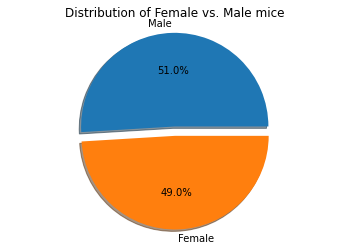

In [208]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
mylabels = ["Male", "Female"]
plt.pie(mice_sex, autopct="%1.1f%%", explode=explodes, labels=mylabels, shadow=True)
plt.title("Distribution of Female vs. Male mice")
plt.axis("equal")
plt.show()


## Quartiles, Outliers and Boxplots

In [209]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
capomulin_df = data_clean_df.loc[data_clean_df["Drug Regimen"] == "Capomulin", :]
ramicane_df = data_clean_df.loc[data_clean_df["Drug Regimen"] == "Ramicane", :]
infubinol_df = data_clean_df.loc[data_clean_df["Drug Regimen"] == "Infubinol", :]
ceftamin_df = data_clean_df.loc[data_clean_df["Drug Regimen"] == "Ceftamin", :]

# Start by getting the last (greatest) timepoint for each mouse
capomulin_lasttime = capomulin_df.groupby("Mouse ID").max()["Timepoint"]
capomulin_lasttime = pd.DataFrame(capomulin_lasttime)

# Merge this group df with the original dataframe to get the tumour volume at the last timepoint
capomulin_merged = pd.merge(capomulin_lasttime, data_clean_df, on=("Mouse ID", "Timepoint"))

# Repeating the previous two steps to create DataFrames for Ramicane, Infubinol, and Ceftamin
ramicane_lasttime = ramicane_df.groupby("Mouse ID").max()["Timepoint"]
ramicane_lasttime = pd.DataFrame(ramicane_lasttime)
infubinol_lasttime = infubinol_df.groupby("Mouse ID").max()["Timepoint"]
infubinol_lasttime = pd.DataFrame(infubinol_lasttime)
ceftamin_lasttime = ceftamin_df.groupby("Mouse ID").max()["Timepoint"]
ceftamin_lasttime = pd.DataFrame(ceftamin_lasttime)

ramicane_merged = pd.merge(ramicane_lasttime, data_clean_df, on=("Mouse ID", "Timepoint"))
infubinol_merged = pd.merge(infubinol_lasttime, data_clean_df, on=("Mouse ID", "Timepoint"))
ceftamin_merged = pd.merge(ceftamin_lasttime, data_clean_df, on=("Mouse ID", "Timepoint"))

capomulin_merged.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumour Volume (mm3),Metastatic Sites
0,b128,45,Capomulin,Female,9,22,38.982878,2
1,b742,45,Capomulin,Male,7,21,38.939633,0
2,f966,20,Capomulin,Male,16,17,30.485985,0
3,g288,45,Capomulin,Male,3,19,37.074024,1
4,g316,45,Capomulin,Female,22,22,40.159220,2


In [210]:
# Merging the above separate DataFrames for each treatment into one complete DataFrame
treatments_merged = pd.merge(pd.merge(pd.merge(capomulin_merged, ramicane_merged, how="outer"), infubinol_merged, how="outer"), ceftamin_merged, how="outer")
treatments_merged

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumour Volume (mm3),Metastatic Sites
0,b128,45,Capomulin,Female,9,22,38.982878,2
1,b742,45,Capomulin,Male,7,21,38.939633,0
2,f966,20,Capomulin,Male,16,17,30.485985,0
3,g288,45,Capomulin,Male,3,19,37.074024,1
4,g316,45,Capomulin,Female,22,22,40.159220,2
...,...,...,...,...,...,...,...,...
95,x226,0,Ceftamin,Male,23,28,45.000000,0
96,x581,45,Ceftamin,Female,19,28,64.634949,3
97,x822,45,Ceftamin,Male,3,29,61.386660,3
98,y769,45,Ceftamin,Female,6,27,68.594745,4


In [211]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumour vol data (for plotting)
capomulin_tumour_vol = []
ramicane_tumour_vol = []
infubinol_tumour_vol = []
ceftamin_tumour_vol = []
tumour_vol_lists = [capomulin_tumour_vol, ramicane_tumour_vol, infubinol_tumour_vol, ceftamin_tumour_vol]

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for x in treatments:   
    
    # Locate the rows which contain mice on each drug and get the tumour volumes
    rows = treatments_merged.loc[treatments_merged["Drug Regimen"] == x]
    if x == "Capomulin":
        capomulin_tumour_vol.append(rows["Tumour Volume (mm3)"])
    elif x == "Ramicane":
        ramicane_tumour_vol.append(rows["Tumour Volume (mm3)"])
    elif x == "Infubinol":
        infubinol_tumour_vol.append(rows["Tumour Volume (mm3)"])
    elif x == "Ceftamin":
        ceftamin_tumour_vol.append(rows["Tumour Volume (mm3)"])

    # Determine outliers using upper and lower bounds
for nx, x in enumerate(tumour_vol_lists):
    quantiles = np.quantile(x, q=np.arange(0.25, 1, 0.25))
    q1 = quantiles[0]
    q3 = quantiles[2]
    iqr = q3 - q1
    lower_bound = q1 - (1.5*iqr)
    upper_bound = q3 + (1.5*iqr)

    # Printing these values
    print("The lower quartile of " + str(treatments[nx]) + " is: " + str(q1) + ".")
    print("The upper quartile of " + str(treatments[nx]) + " is: " + str(q3) + ".")
    print("The interquartile range of " + str(treatments[nx]) + " is: " + str(iqr) + ".")
    print("Values below " + str(lower_bound) + " may be outliers.")
    print("Values above " + str(upper_bound) + " may be outliers.")
    
    # Finding exact values of potential outliers and printing them
    for x in tumour_vol_lists[nx]:
        for y in x:
            if y > upper_bound:
                print("Value " + str(y) + " may be an outlier.")
            if y < lower_bound:
                print("Value " + str(y) + " may be an outlier.")
    print("-----------------------------------")

The lower quartile of Capomulin is: 32.37735684.
The upper quartile of Capomulin is: 40.1592203.
The interquartile range of Capomulin is: 7.781863460000004.
Values below 20.70456164999999 may be outliers.
Values above 51.83201549 may be outliers.
-----------------------------------
The lower quartile of Ramicane is: 31.56046955.
The upper quartile of Ramicane is: 40.65900627.
The interquartile range of Ramicane is: 9.098536719999998.
Values below 17.912664470000003 may be outliers.
Values above 54.30681135 may be outliers.
-----------------------------------
The lower quartile of Infubinol is: 54.04860769.
The upper quartile of Infubinol is: 65.52574285.
The interquartile range of Infubinol is: 11.477135160000003.
Values below 36.83290494999999 may be outliers.
Values above 82.74144559000001 may be outliers.
Value 36.321345799999996 may be an outlier.
-----------------------------------
The lower quartile of Ceftamin is: 48.72207785.
The upper quartile of Ceftamin is: 64.29983003.
The 

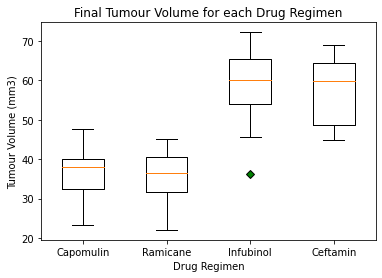

In [219]:
# Generate a box plot of the final tumour volume of each mouse across four regimens of interest
fig1, ax1 = plt.subplots()
data_to_plot = [capomulin_merged["Tumour Volume (mm3)"], ramicane_merged["Tumour Volume (mm3)"], infubinol_merged["Tumour Volume (mm3)"], ceftamin_merged["Tumour Volume (mm3)"]]
ax1.set_title("Final Tumour Volume for each Drug Regimen")
ax1.set_ylabel("Tumour Volume (mm3)")
ax1.set_xlabel("Drug Regimen")
green_diamond = dict(markerfacecolor='g', marker='D')
ax1.boxplot(data_to_plot, labels=treatments, vert=True, widths=0.5, flierprops=green_diamond)
plt.show()

## Line and Scatter Plots

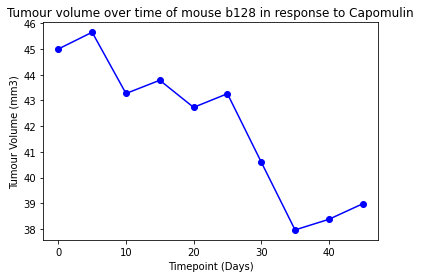

In [224]:
# Generate a line plot of tumour volume vs. time point for a mouse treated with Capomulin
capomulin_mouse = capomulin_df.loc[capomulin_df["Mouse ID"]=="b128"]
plt.plot(capomulin_mouse["Timepoint"], capomulin_mouse["Tumour Volume (mm3)"], marker="o", color="b")
plt.title("Tumour volume over time of mouse b128 in response to Capomulin")
plt.xlabel("Timepoint (Days)")
plt.ylabel("Tumour Volume (mm3)")
plt.show()

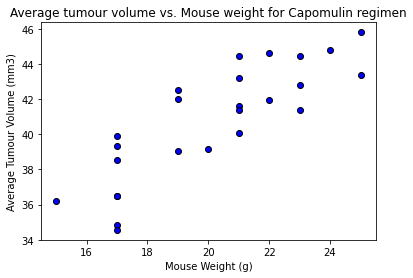

In [229]:
# Generate a scatter plot of average tumour volume vs. mouse weight for the Capomulin regimen
capomulin_avg = capomulin_df.groupby("Mouse ID").mean()
plt.scatter(capomulin_avg["Weight (g)"], capomulin_avg["Tumour Volume (mm3)"], marker="o", facecolors="b", edgecolors="black")
plt.title("Average tumour volume vs. Mouse weight for Capomulin regimen")
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Average Tumour Volume (mm3)")
plt.show()

## Correlation and Regression

In [230]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumour volume for the Capomulin regimen
corr = st.pearsonr(capomulin_avg["Weight (g)"], capomulin_avg["Tumour Volume (mm3)"])
print(f"The correlation between mouse weight and the average tumour volume is: {round(corr[0], 2)}")


The correlation between mouse weight and the average tumour volume is: 0.84


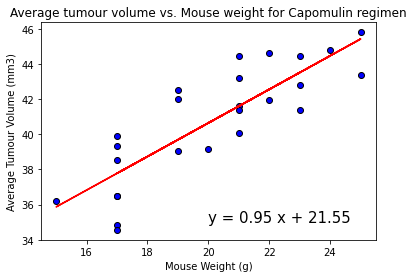

In [241]:
# Plotting the linear regression line on the previous scatter plot
x_values = capomulin_avg["Weight (g)"]
y_values = capomulin_avg["Tumour Volume (mm3)"]
(slope, intercept, r_value, p_value, std) = linregress(x_values, y_values)
regress = x_values * slope + intercept
equation = f"y = {round(slope, 2)} x + {round(intercept, 2)}"
plt.scatter(x_values, y_values, marker="o", facecolors="b", edgecolors="black")
plt.plot(x_values, regress, color="r")
plt.annotate(equation, (20, 35), fontsize=15)
plt.title("Average tumour volume vs. Mouse weight for Capomulin regimen")
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Average Tumour Volume (mm3)")
plt.show()